In [ ]:
%matplotlib inline


# Canny edge detector

The Canny filter is a multi-stage edge detector. It uses a filter based on the
derivative of a Gaussian in order to compute the intensity of the gradients.The
Gaussian reduces the effect of noise present in the image. Then, potential
edges are thinned down to 1-pixel curves by removing non-maximum pixels of the
gradient magnitude. Finally, edge pixels are kept or removed using hysteresis
thresholding on the gradient magnitude.

The Canny has three adjustable parameters: the width of the Gaussian (the
noisier the image, the greater the width), and the low and high threshold for
the hysteresis (histerese) thresholding.


# Canny com Skimage
https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.canny

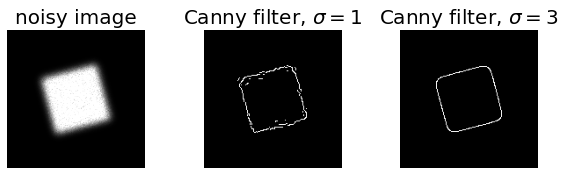

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature


# Generate noisy image of a square
image = np.zeros((128, 128), dtype=float)
image[32:-32, 32:-32] = 1

image = ndi.rotate(image, 15, mode='constant')
image = ndi.gaussian_filter(image, 4)
image = random_noise(image, mode='speckle', mean=0.1)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('noisy image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

# Canny com OpenCV

[cv.Canny()](https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html)



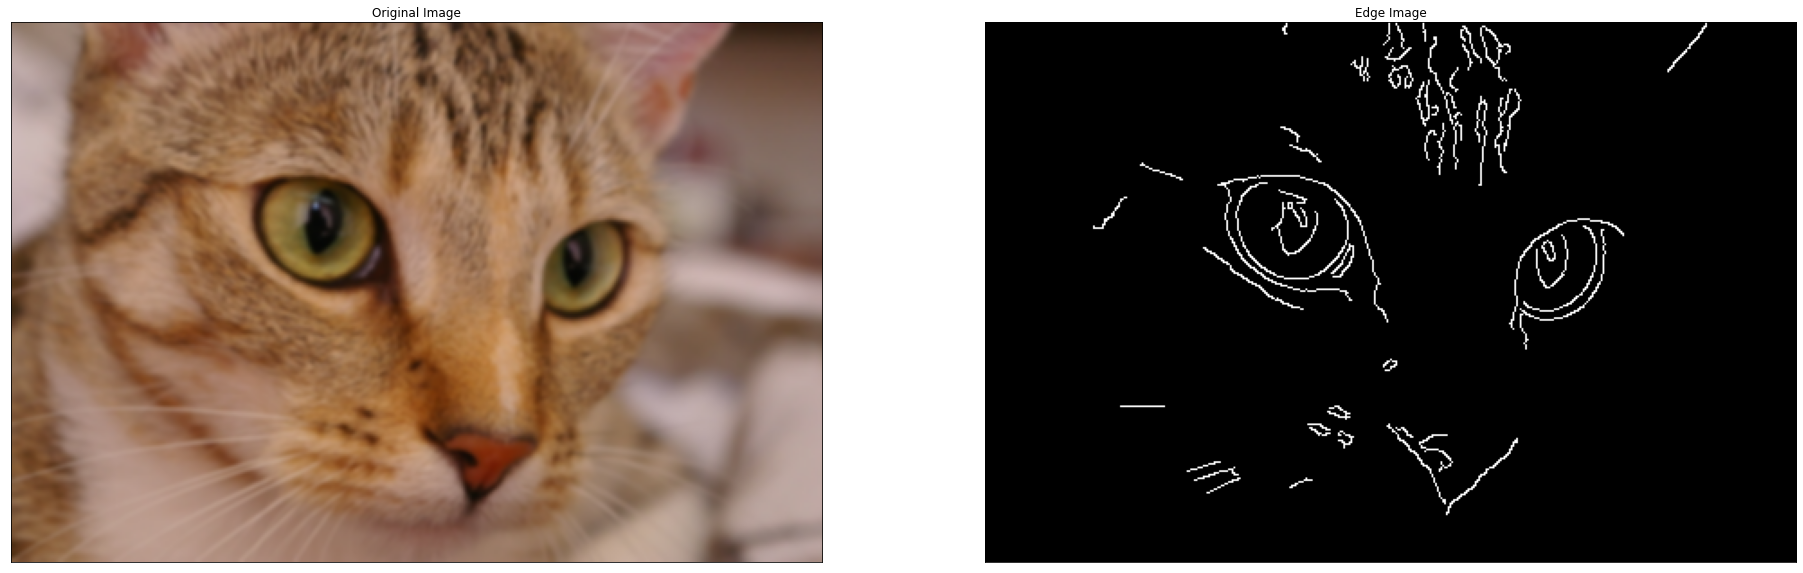

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import data

img = data.chelsea()
# First argument is our input image. Second and third arguments are our minVal and maxVal respectively. 
img = cv.GaussianBlur(img,(5,5),0)
edges = cv.Canny(img,100,200)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()